# Libraries

In [146]:
import math
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score, precision_score, recall_score, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from xgboost import XGBClassifier


from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [147]:
import warnings
warnings.filterwarnings('ignore')

# Read in data

In [148]:
df = pd.read_csv(r"c:\Users\magni\Documents\Classes\MIS581 Capstone\data\dataset_full_preprocessed.csv")
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [149]:
df.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url',
       'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url',
       'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url',
       'email_in_url', 'qty_dot_domain', 'qty_hyphen_domain',
       'qty_underline_domain', 'qty_at_domain', 'qty_vowels_domain',
       'server_client_domain', 'domain_length', 'domain_in_ip',
       'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory',
       'qty_slash_directory', 'qty_equal_directory', 'qty_at_directory',
       'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory',
       'qty_asterisk_directory', 'qty_dollar_directory',
       'qty_percent_directory', 'directory_length', 'qty_dot_file',
  

In [150]:
df.shape

(88647, 92)

# Split train/test

In [151]:
X = df.iloc[:,:-1]
y = df['phishing']

In [152]:
X.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url',
       'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url',
       'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url',
       'email_in_url', 'qty_dot_domain', 'qty_hyphen_domain',
       'qty_underline_domain', 'qty_at_domain', 'qty_vowels_domain',
       'server_client_domain', 'domain_length', 'domain_in_ip',
       'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory',
       'qty_slash_directory', 'qty_equal_directory', 'qty_at_directory',
       'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory',
       'qty_asterisk_directory', 'qty_dollar_directory',
       'qty_percent_directory', 'directory_length', 'qty_dot_file',
  

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base Classifiers

In [14]:
RANDOM_SEED = 0

## RF

In [11]:
rf_clf = joblib.load("models/rf.joblib")
rf_clf

RandomForestClassifier(n_estimators=10, random_state=0)

## ET

In [12]:
et_clf = joblib.load("models/et.joblib")
et_clf

ExtraTreesClassifier(n_estimators=5, random_state=0)

## KNN

In [13]:
knn_clf = joblib.load("models/knn.joblib")
knn_clf

KNeighborsClassifier(n_neighbors=2)

## XGBoost

In [15]:
xgb_clf = joblib.load("models/xgb.joblib")
xgb_clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

## LR

In [16]:
lr_clf = joblib.load("models/lr.joblib")
lr_clf

LogisticRegression(C=20000, random_state=0)

## Ada

In [17]:
adab_clf = joblib.load("models/abc.joblib")
adab_clf

AdaBoostClassifier(n_estimators=100, random_state=0)

# Stacked Classifier

In [5]:
sclf = joblib.load("models/sclf_default.joblib")
sclf

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=0)),
                               ('knn', KNeighborsClassifier(n_neighbors=2)),
                               ('xgb',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              gpu_id=-1, importance_type='gain',
                                              interaction_constraints='',
                                              learning_rate=0.300000012,
                                              max_delt...
                                              num_parallel_tree=1,
                                              random_state=0

# Metrics

## Compiled metrics

In [18]:
def stacking_metrics(classifier_array_op=[]):
    #classifier_array_op = [rf_clf_op, knn_clf_op, xgb_clf_op, lr_clf_op, et_clf_op, adab_clf_op, sclf_op]
    labels_classifiers_op = [clf.__class__.__name__ for clf in classifier_array_op]

    final_metrics_op = []
    metrics_op={}
    labels_list_op = []
    mse_op = []
    r2_op = []
    acc_op = []
    f1_op = []
    precision_op = []
    recall_op = []

    for clf, label in zip(classifier_array_op, labels_classifiers_op):
        #clf.fit(X_train, y_train)
        print(label)
        labels_list_op.append(label)
        mse_op.append(mean_squared_error(y_test, clf.predict(X_test)))
        acc_op.append(accuracy_score(y_test, clf.predict(X_test)))
        f1_op.append(f1_score(y_test, clf.predict(X_test)))
        precision_op.append(precision_score(y_test, clf.predict(X_test)))
        recall_op.append(recall_score(y_test, clf.predict(X_test)))
        r2_op.append(r2_score(y_test, clf.predict(X_test)))
        
    final_metrics_op = []
    metrics_op={}
    metrics_pd_op = pd.DataFrame()

    for a, b, c, d, e, f, g in zip(labels_list_op, mse_op, acc_op, f1_op, precision_op, recall_op, r2_op):
        metrics_op = {'classifier' : a, 'mse' : b, 'accuracy' : c, 'F1' : d, 'precision' : e, 'recall': f, "R2" : g}
        final_metrics_op.append(metrics_op) 
    metrics_pd_op = pd.DataFrame(final_metrics_op)
    return metrics_pd_op


In [28]:
stacking = stacking_metrics(classifier_array_op=[rf_clf, knn_clf, xgb_clf, lr_clf, et_clf, adab_clf, sclf])
stacking

RandomForestClassifier
KNeighborsClassifier
XGBClassifier
LogisticRegression
ExtraTreesClassifier
AdaBoostClassifier
StackingClassifier


,classifier,mse,accuracy,F1,precision,recall,R2
0,RandomForestClassifier,0.032995,0.967005,0.951951,0.956744,0.947205,0.854002
1,KNeighborsClassifier,0.120699,0.879301,0.809235,0.890000,0.741909,0.465920
2,XGBClassifier,0.042583,0.957417,0.939196,0.925702,0.953089,0.811575
3,LogisticRegression,0.124929,0.875071,0.802673,0.882123,0.736352,0.447203
4,ExtraTreesClassifier,0.037733,0.962267,0.945614,0.940644,0.950637,0.833038
5,AdaBoostClassifier,0.053469,0.946531,0.922435,0.923493,0.921380,0.763408
6,StackingClassifier,0.029103,0.970897,0.957878,0.956784,0.958974,0.871222


## Confusion matrix

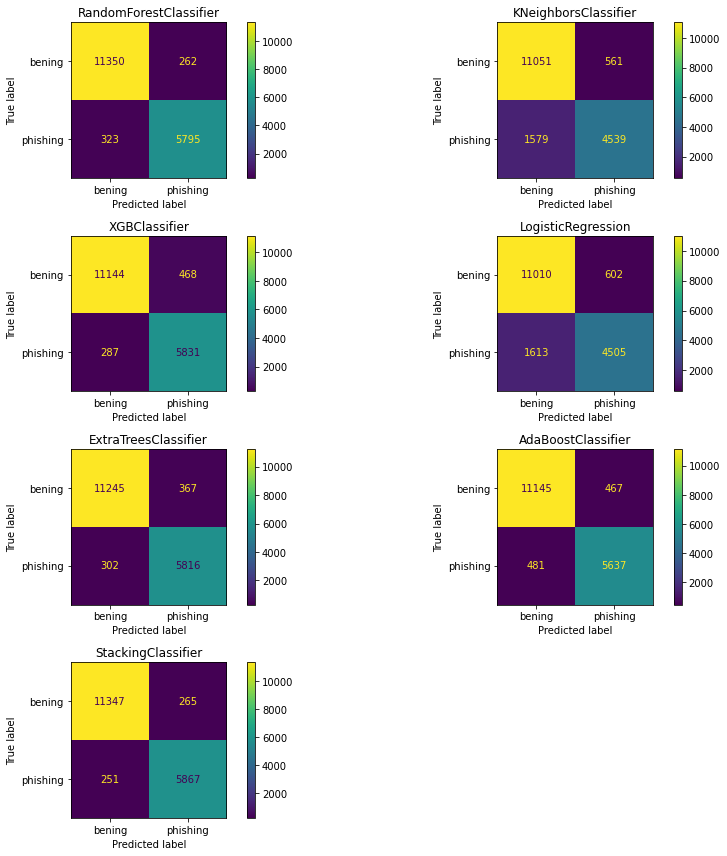

In [29]:
gs = gridspec.GridSpec(4, 2)
fig = plt.figure(figsize=(12,12))

classifier_array_op = [rf_clf, knn_clf, xgb_clf, lr_clf, et_clf, adab_clf, sclf]
labels_classifiers_op = [clf.__class__.__name__ for clf in classifier_array_op]


for clf, label, grd in zip(classifier_array_op, labels_classifiers_op, [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1),(3,0)]):
    #clf.fit(X_train.head(100), y_train.head(100))
    ax = plt.subplot(gs[grd[0], grd[1]])
    cm = confusion_matrix(y_test, clf.predict(X_test), normalize=None)
    fig = ConfusionMatrixDisplay(cm, display_labels=['bening','phishing'])
    fig.plot(ax=ax)
    plt.title(label) 
plt.tight_layout()
plt.show()


## ROC

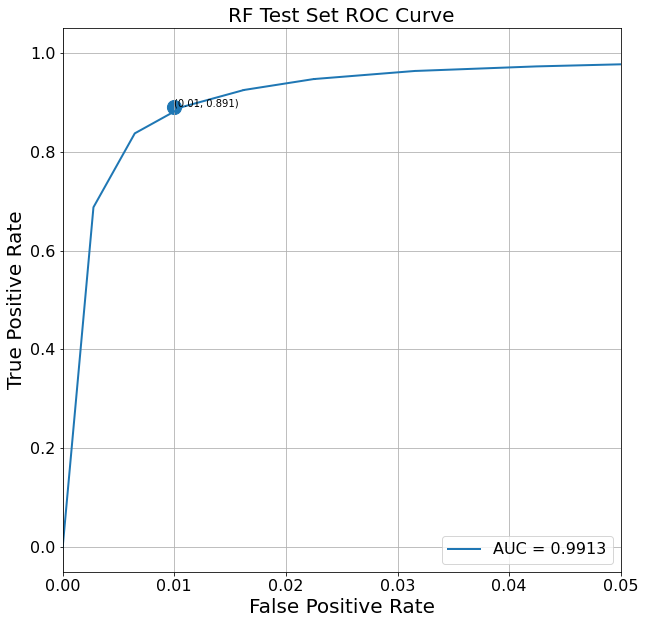

In [35]:
import matplotlib.pyplot as plt
def plot_roc(y_all, y_pred_all):
    auc = roc_auc_score(y_all, y_pred_all)
    fig = plt.figure(figsize=(10, 10))
    fpr_opt = 0.01
    #plt.plot([fpr_opt, fpr_opt], [0, 1], '--')
    fpr, tpr, thresh = roc_curve(y_all, y_pred_all)    
    idx = np.argmax(fpr>fpr_opt)
    tpr_opt = tpr[idx]
    tpr_opt = np.round(tpr_opt,4)
    thresh_opt = thresh[idx]
    plt.plot(fpr, tpr, linewidth=2, label="AUC = %s"%(round(auc, 4)))
    plt.scatter(fpr_opt, tpr_opt, marker='o',s=200)
    plt.text(fpr_opt, tpr_opt, (fpr_opt, tpr_opt))
    plt.xlabel('False Positive Rate',fontsize = 20)
    plt.ylabel('True Positive Rate',fontsize = 20)
    plt.legend(loc='lower right',fontsize = 16)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    #plt.title('Test ROC Curve (FPR_opt = ' + str(round(fpr_opt,4)) + ')',fontsize = 20)
    plt.title('RF Test Set ROC Curve', fontsize = 20)
    #plt.gca().set_xscale("log")
    plt.xlim(0.0, 0.05)
    plt.gca().grid(True)
    plt.show()
    #plt.savefig(output_path + '/' + 'roc_rawbytes_updated_labels.png')
    return tpr_opt, thresh_opt, auc, fpr_opt
tpr_opt, thresh_opt, auc, fpr_opt = plot_roc(y_test, rf_clf.predict_proba(X_test)[:,1])
#print(tpr_opt, thresh_opt, auc, fpr_opt)

RandomForestClassifier 0.05 0.9727 0.4 0.9912673543291498
KNeighborsClassifier 0.05 0.7419 1.0 0.9118850966022793
XGBClassifier 0.05 0.9658 0.41422173 0.9901411155305178
LogisticRegression 0.05 0.7254 0.5230885604647787 0.9467525689232442
ExtraTreesClassifier 0.05 0.9506 0.5 0.9867872505553598
AdaBoostClassifier 0.05 0.9377 0.4990393250026674 0.9868297745667167
StackingClassifier 0.05 0.9828 0.10419967238905072 0.9945347073632951


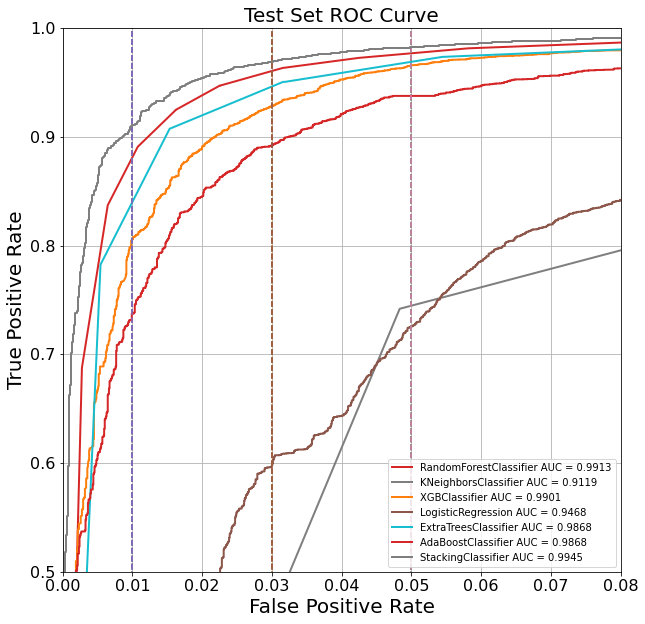

In [78]:
classifier_array_op = [rf_clf, knn_clf, xgb_clf, lr_clf, et_clf, adab_clf, sclf]
labels_classifiers_op = [clf.__class__.__name__ for clf in classifier_array_op]

def plot_roc(classifier_array_op, labels_classifiers_op):
    fig = plt.figure(figsize=(10, 10))
    for clf, label in zip(classifier_array_op, labels_classifiers_op):
        arr_pred = clf.predict_proba(X_test)[:,1]
    
        auc1 = roc_auc_score(y_test, arr_pred)
        fpr1, tpr1, thresh1 = roc_curve(y_test, arr_pred) 
        #print(type(fpr1))
        #fig = plt.figure(figsize=(10, 10))
        fpr_opt1 = 0.01
        fpr_opt2 = 0.03
        fpr_opt3= 0.05
        plt.plot([fpr_opt1, fpr_opt1], [0, 1], '--')
        plt.plot([fpr_opt2, fpr_opt2], [0, 1], '--')
        plt.plot([fpr_opt3, fpr_opt3], [0, 1], '--')
        idx1 = np.argmax(fpr1 >= fpr_opt)
        idx1 = idx1-1
        tpr_opt1 = tpr1[idx1]
        tpr_opt1 = np.round(tpr_opt1,4)
        thresh_opt1 = thresh1[idx1]
        #plt.plot([tpr_opt1, tpr_opt1], [1, 0], '--')
        plt.plot(fpr1, tpr1, linewidth=2, label="{} AUC = {}".format(label, round(auc1, 4)))
        #plt.scatter(fpr_opt, tpr_opt1, marker='o',s=200)
        #plt.plot(fpr_opt, tpr_opt1, 'bo')
        #plt.text(fpr_opt, tpr_opt1, (fpr_opt, tpr_opt1)) 
        print(label, fpr_opt, tpr_opt1, thresh_opt1, auc1)
    
    plt.xlabel('False Positive Rate',fontsize = 20)
    plt.ylabel('True Positive Rate',fontsize = 20)
    plt.legend(loc='lower right',fontsize = 10)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    #plt.title('Test ROC Curve (FPR_opt = ' + str(round(fpr_opt,4)) + ')',fontsize = 20)
    plt.title('Test Set ROC Curve', fontsize = 20)
    plt.xlim(0, 0.08)
    plt.ylim(0.5, 1)
    #plt.gca().set_xscale("log")
    plt.gca().grid(True)
    plt.show()
    #plt.savefig(output_path + '/' + 'roc_rawbytes_updated_labels.png')
    return tpr_opt1, thresh_opt1, auc1, fpr_opt
tpr_opt, thresh_opt, auc, fpr_opt = plot_roc(classifier_array_op, labels_classifiers_op)
#print(tpr_opt, thresh_opt, auc, fpr_opt)

## Visualize Accuracy

In [91]:
stacking

,classifier,mse,accuracy,F1,precision,recall,R2
0,RandomForestClassifier,0.032995,0.967005,0.951951,0.956744,0.947205,0.854002
1,KNeighborsClassifier,0.120699,0.879301,0.809235,0.890000,0.741909,0.465920
2,XGBClassifier,0.042583,0.957417,0.939196,0.925702,0.953089,0.811575
3,LogisticRegression,0.124929,0.875071,0.802673,0.882123,0.736352,0.447203
4,ExtraTreesClassifier,0.037733,0.962267,0.945614,0.940644,0.950637,0.833038
5,AdaBoostClassifier,0.053469,0.946531,0.922435,0.923493,0.921380,0.763408
6,StackingClassifier,0.029103,0.970897,0.957878,0.956784,0.958974,0.871222


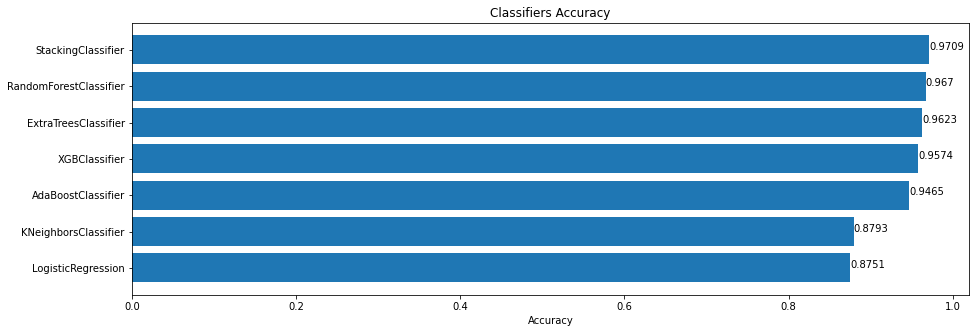

In [142]:
# Import Library

import matplotlib.pyplot as plt

# Define Data
new = stacking[['accuracy', 'classifier']].sort_values(by='accuracy')
y = list(new['classifier'])
x_list = list(new['accuracy'])
x = [round((x),4) for x in x_list]

plt.figure(figsize=(15,5)) 

# Plot horizontal bar chart
bars = plt.barh(y,x)

# To get data labels
for  bar in bars:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
    
# Define axes labels
plt.xlabel("Accuracy")
plt.title("Classifiers Accuracy")

# Display a bar chart 
plt.show()

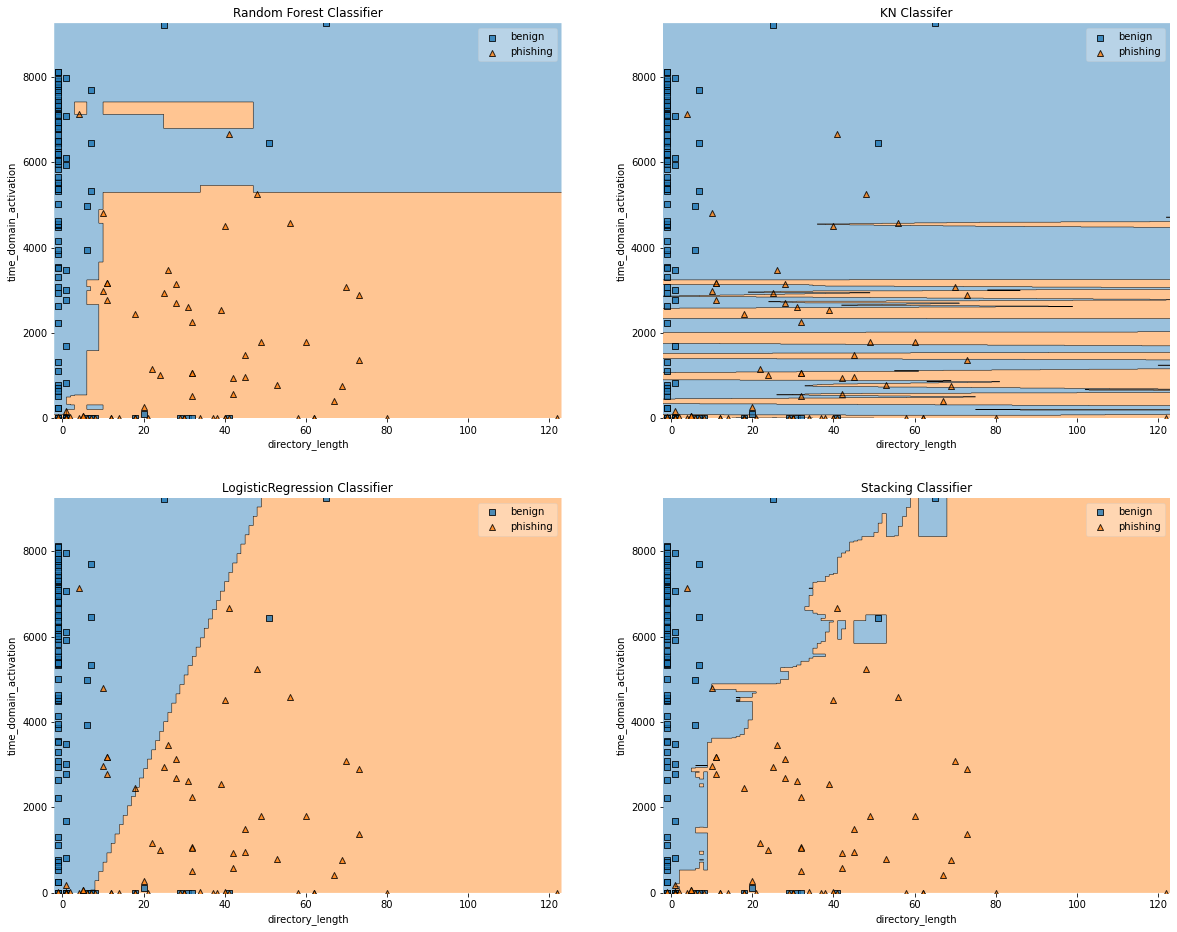

In [29]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

#Decision Regions for 4 algorithms.
X1 = df[['directory_length','time_domain_activation']].head(200).to_numpy()
y1 = np.array(y[:200])

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,16))


for clf, label, grd in zip([rf_clf, knn_clf, lr_clf, sclf], ["Random Forest Classifier", "KN Classifer", "LogisticRegression Classifier", "Stacking Classifier"], itertools.product([0, 1], repeat=2)):
    clf.fit(X1, y1)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X1, y=y1, clf=clf, legend=2)
    plt.title(label)
    plt.xlabel('directory_length')
    plt.ylabel('time_domain_activation')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, 
              ['benign', 'phishing'], 
               framealpha=0.3, scatterpoints=1)    
plt.show()

